# Titanic Dataset Exploration
## by Sayan Chakraborty

## Investigation Overview

> This analysis will contain an analysis of the tragic titanic event of 1912. The whole dataset is divided into 2 parts. The training and testing data. In general these are data for building a machine learning model. But in my case I will be doing a visualization of the analysis to come up with some idea on the tragic event without applying any regression models or any ML algorithms to do any kind of predictive analysis, since that is out of scope right now.

## Dataset Overview
> Data source is Kaggle: https://www.kaggle.com/c/titanic/data.  
It contains 891 values and 12 columns which are as follows:  

`PassengerId      int64  
 Survived         int64  
 Pclass           int64  
 Sex             object  
 Age            float64  
 SibSp            int64  
 Parch            int64  
 Fare           float64  
 Embarked        object`  

<img src="titanic_data.png">

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_train = pd.read_csv('Dataset/titanic/train.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> I have presented the combined univariate visualization here for simplicity. More detailed visualizations are present in the exploration notebook.  
To begin with we can see the following points:  
- There were more number of survivers than the ones who couldn't. To be more specific: around 38% of the people were unfortunate enough to not make it through.  
- There were more people in the general class (class 3) than that of the other passenger classes.
- There were more male passengers than females.
- There were more passengers with 0 sibligs/spouses on-board.
- There were more passengers with 0 parents on-board.
- Most of the passengers onboarded from Southampton.
- The fares distribution is mostly right skewed. Most of the people were paying around 8.05 bucks. There were 43 such fare counts. 
- The age is somewhat normally distributed with slight deviations as seen from the kde distribution below. Most of the people are aged between 25-40.

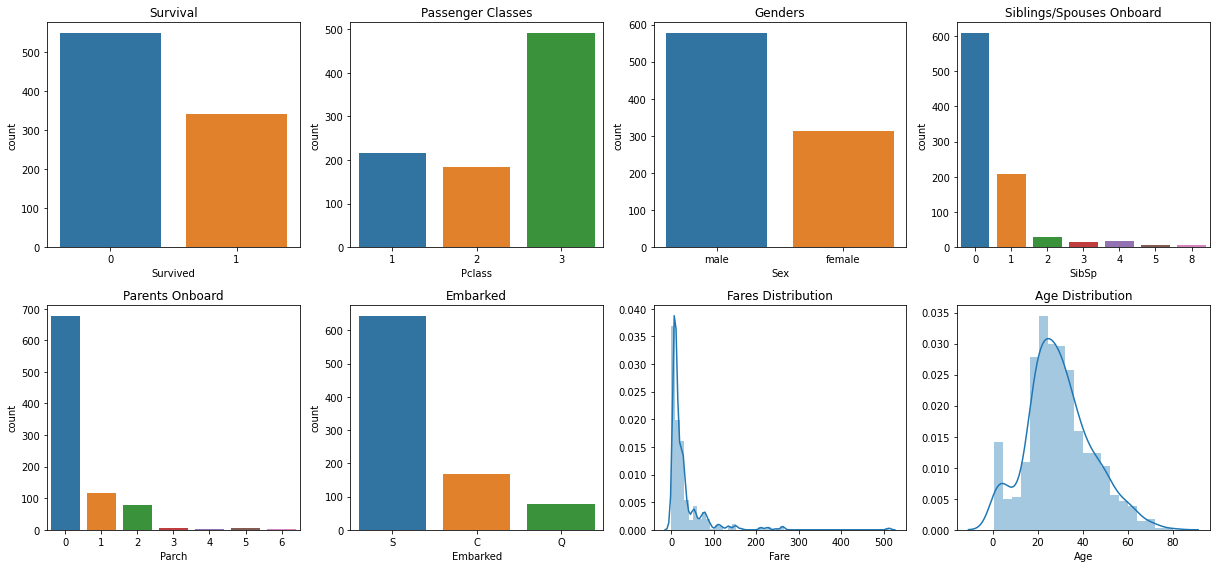

In [3]:
ig, axes = plt.subplots(2, 4, figsize = (17, 8))

sns.countplot('Survived', data = df_train, ax = axes[0,0]);
axes[0,0].title.set_text('Survival')

sns.countplot('Pclass', data = df_train, ax = axes[0,1]);
axes[0,1].title.set_text('Passenger Classes')

sns.countplot('Sex', data = df_train,ax = axes[0,2]);
axes[0,2].title.set_text('Genders')

sns.countplot('SibSp', data = df_train, ax = axes[0,3]);
axes[0,3].title.set_text('Siblings/Spouses Onboard')

sns.countplot('Parch', data = df_train, ax = axes[1,0]);
axes[1,0].title.set_text('Parents Onboard')

sns.countplot('Embarked', data = df_train, ax = axes[1,1]);
axes[1,1].title.set_text('Embarked')

sns.distplot(df_train['Fare'], kde = True, ax = axes[1,2]);
axes[1,2].title.set_text('Fares Distribution')

sns.distplot(df_train['Age'].dropna(), kde = True, ax = axes[1,3]);
axes[1,3].title.set_text('Age Distribution')

plt.tight_layout()

## (Visualization 2)

> Again, I have presented the coorelation heatmap here. More detailed visualizations are already presented in the exploration notebook.  
To begin with we can see the following points:  
- There were more number of survivers than the ones who couldn't. To be more specific: around 38% of the people were unfortunate enough to not make it through.  
- People belonging to passenger class 1 were basically more lucky than the lower tier ones.
- There were more females who survived that the males.
- Passengers with 1-2 sibligs seemed to be more lucky
- Passengers with around 3 parents onboard had a greater survival chance
- It seems like people who were fortunate enough were on the age group of 0-80 with the IQR around 20-38.
- Other than that it seems like higher you paid, a slight higher were the chances of you surviving. For the people who survived the fares ranged from 0 to all the way 512. For the unfortunate ones the fares ranged from 0 to around 290.

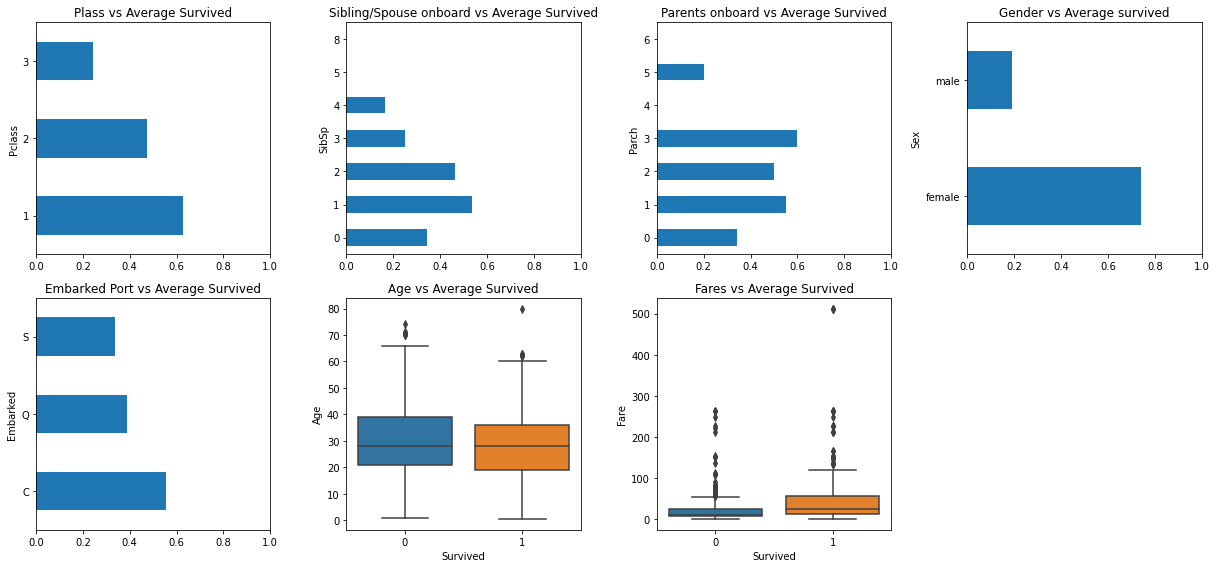

In [4]:
cust_fig, cust_axis = plt.subplots(2, 4, figsize=(17, 8));

df_train.groupby('Pclass')['Survived'].mean().plot(kind = 'barh',ax = cust_axis[0,0],xlim = [0,1]);
cust_axis[0,0].title.set_text('Plass vs Average Survived')

df_train.groupby('SibSp')['Survived'].mean().plot(kind = 'barh',ax = cust_axis[0,1],xlim = [0,1]);
cust_axis[0,1].title.set_text('Sibling/Spouse onboard vs Average Survived')

df_train.groupby('Parch')['Survived'].mean().plot(kind = 'barh',ax = cust_axis[0,2],xlim = [0,1]);
cust_axis[0,2].title.set_text('Parents onboard vs Average Survived')

df_train.groupby('Sex')['Survived'].mean().plot(kind = 'barh',ax = cust_axis[0,3],xlim = [0,1]);
cust_axis[0,3].title.set_text('Gender vs Average survived')

df_train.groupby('Embarked')['Survived'].mean().plot(kind = 'barh', ax = cust_axis[1,0], xlim = [0,1]);
cust_axis[1,0].title.set_text('Embarked Port vs Average Survived')

sns.boxplot("Survived", "Age", data = df_train, ax = cust_axis[1,1]);
cust_axis[1,1].title.set_text('Age vs Average Survived')

sns.boxplot("Survived", "Fare", data = df_train, ax = cust_axis[1,2]);
cust_axis[1,2].title.set_text('Fares vs Average Survived')

# hiding the last subplot:
cust_fig.delaxes(cust_axis[1][3])

plt.tight_layout()

## (Visualization 3)

> From the heatmap visualization presented we can conclude the following:

1. There is a positve coorelation between the fares and the number of people who survived.  
2. There is a negative coorelation between the passenger class and the number of people who surived.
3. There is a negative coorelation between the fares and the passenger class. 
4. There is also a negative coorelation between the ages and the passenger classes.

Text(0.5, 1.0, 'Heatmap to show the coorelation betewen the different features')

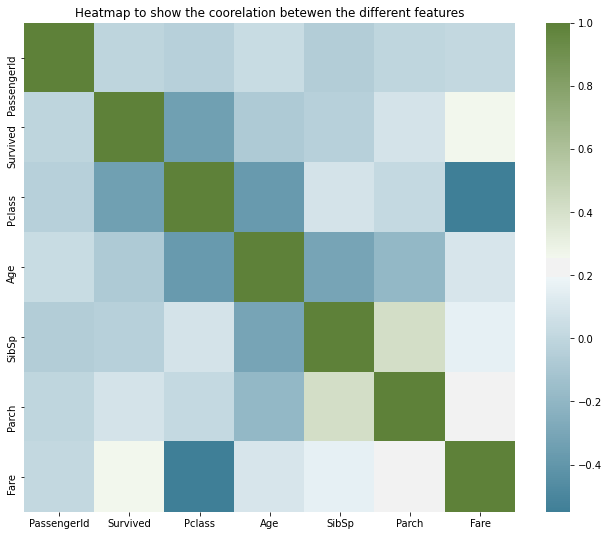

In [5]:
fig, cust_axis = plt.subplots(figsize=(11, 9))

multi_corr = df_train.corr()

sns.heatmap(multi_corr,
            mask   = np.zeros_like(multi_corr, dtype = np.bool), 
            cmap   = sns.diverging_palette(225, 112, as_cmap = True),
            square = False, 
            ax     = cust_axis);
plt.title('Heatmap to show the coorelation betewen the different features')